In [1]:
from fastai.vision import *

## Download Images

### Create Folders

In [2]:
folder = 'ketupat'
file = 'urls_ketupat.csv'

In [3]:
folder = 'bazang'
file = 'urls_bazang.csv'

In [4]:
path = Path('data/food')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
path.ls()

[WindowsPath('data/food/bazang'),
 WindowsPath('data/food/ketupat'),
 WindowsPath('data/food/models'),
 WindowsPath('data/food/urls_bazang.csv'),
 WindowsPath('data/food/urls_ketupat.csv')]

### Download Images

In [6]:
classes = ['ketupat','bazang']

In [7]:
path/file

WindowsPath('data/food/urls_bazang.csv')

In [8]:
download_images(path/file, dest,max_pics=200, max_workers=0)

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View Data

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['bazang', 'ketupat']

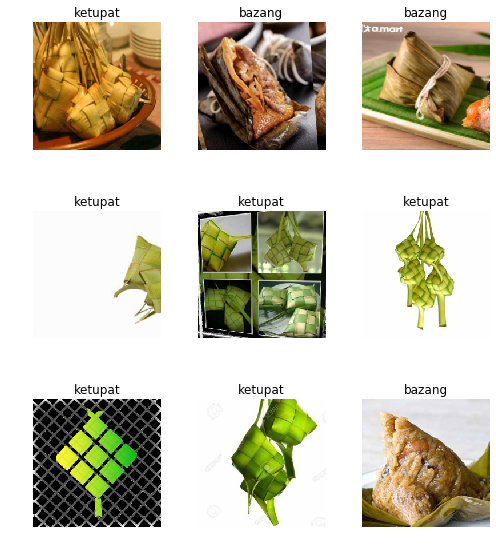

In [12]:
data.show_batch(rows=3, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bazang', 'ketupat'], 2, 226, 56)

## Train Model

In [44]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.882393,0.427541,0.160714,00:19
1,0.656237,0.702859,0.250000,00:16
2,0.495170,0.656556,0.232143,00:15
3,0.400848,0.561049,0.160714,00:15


In [16]:
learn.save('stage-1')

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


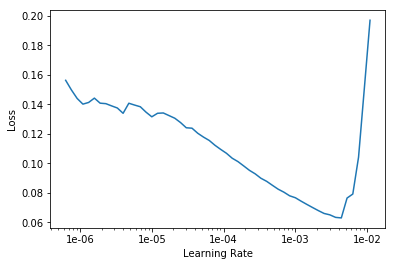

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.161131,0.950339,0.285714,00:19
1,0.106591,3.682054,0.464286,00:19
2,0.108235,1.106831,0.142857,00:17
3,0.106703,8.277658,0.285714,00:16
4,0.124613,27.542276,0.446429,00:16
5,0.112445,29.844732,0.464286,00:16
6,0.103827,18.043575,0.446429,00:16
7,0.094181,6.297158,0.303571,00:16
8,0.092704,2.419903,0.214286,00:16
9,0.082167,1.124223,0.125000,00:16


In [21]:
learn.save('stage-2')

## Interpretation

In [45]:
learn.load('stage-2');

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

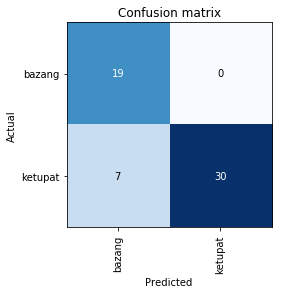

In [24]:
interp.plot_confusion_matrix()

## Data Cleaning

In [25]:
from fastai.widgets import *

In [26]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [46]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [32]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [47]:
learn.fit_one_cycle(10, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.045794,0.651838,0.089286,00:16
1,0.046868,0.382215,0.071429,00:16
2,0.043203,0.330170,0.053571,00:18
3,0.036144,0.367865,0.053571,00:17
4,0.029761,0.404343,0.053571,00:18
5,0.035883,0.351714,0.053571,00:19
6,0.037000,0.307119,0.053571,00:18
7,0.031707,0.290050,0.053571,00:19
8,0.027968,0.274075,0.053571,00:18
9,0.024862,0.265029,0.053571,00:18


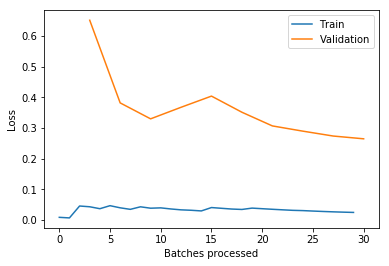

In [48]:
learn.recorder.plot_losses()

## Putting Model into Production

In [49]:
learn.export()

In [50]:
defaults.device = torch.device('cpu')

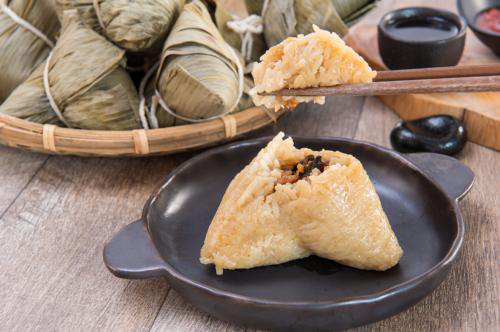

In [51]:
img = open_image(path/'bazang'/'00000021.jpg')
img

In [52]:
learn = load_learner(path)

In [53]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bazang

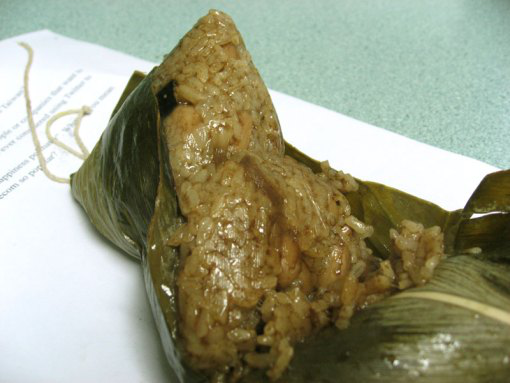

In [55]:
img = open_image(r'C:\Users\LohJZ\Downloads\cooked-bazang1.jpg')
img

In [56]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bazang